<a href="https://colab.research.google.com/github/bearivh/Introduction-to-Artificial-Intelligence/blob/main/%5BAI_Assignment1%5D%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.


In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,NaN,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,NaN,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,NaN,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,NaN,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


# Data Statistics
Describe statistics of data using `describe()` method for numeric data (default mode.)



In [22]:
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


For categorical data, specify `include` parametor as `'object'`.
(hint, refer [`pd.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html))

In [23]:
df.describe(include=object)

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,89,92,90,55,86,88,88,88,90
unique,31,92,6,2,3,6,2,2,90
top,Chevrolet,Integra,Midsize,Driver only,Front,4,Yes,USA,Acura Integra
freq,8,1,22,39,61,45,57,46,1


## Measuring skewness


First, make a numeric_columns by selecting only columns containing numerical data

In [24]:
numericColumns = df.describe().columns
numericColumns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

**[TODO]** Measure skewness for all numeric attribute and sort by value. (hint, please refer document of pandas [[ref](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)].)

In [25]:
skewness = df[numericColumns].skew().sort_values(ascending = False)
skewness

,0
Max.Price,2.248420
MPG.city,1.662674
Price,1.510432
MPG.highway,1.238671
Min.Price,1.227271
Horsepower,0.944585
EngineSize,0.881670
Rev.per.mile,0.354385
Width,0.288760
Luggage.room,0.149069


## Graphic visualization of skewness

**[TODO]** Select the Attributes that skewness value is the largest, smallest and the closet to zero.
* For zero skewness attribue, you can specify attribute. e.g., `df['RPM']`

In [26]:
highSkewAttribute = df[skewness.idxmax()]
lowSkewAttribute = df[skewness.idxmin()]
zeroSkewAttribute = df['Length']

Draw plots. See how the distribution depends on the Skewness

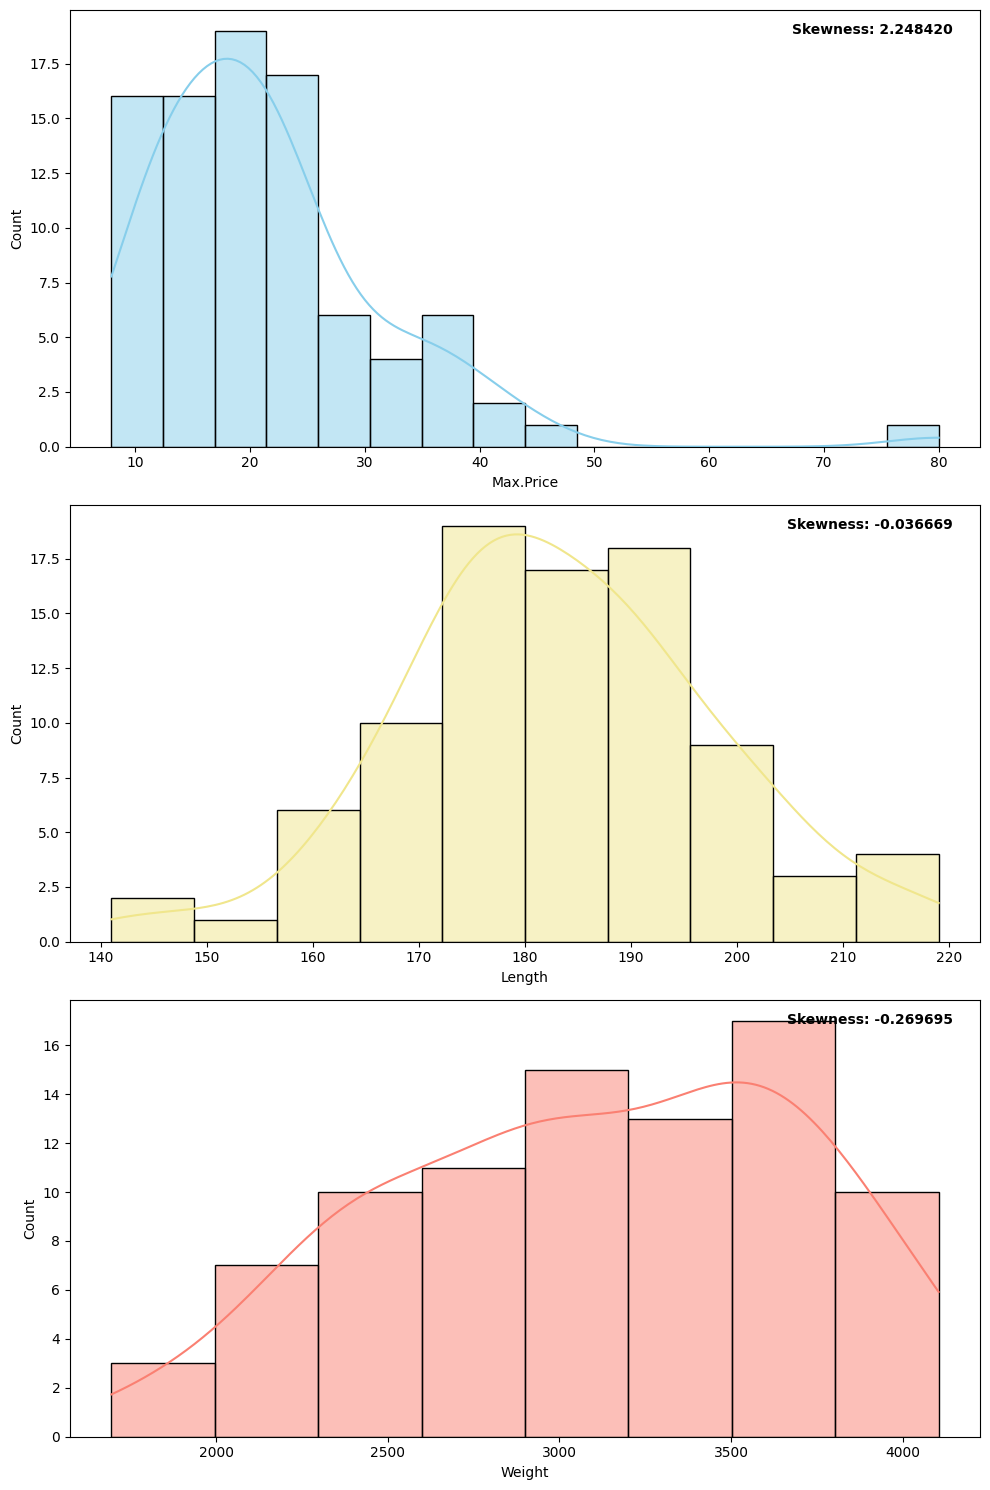

In [27]:
f, axes = plt.subplots(3, 1, figsize=(10, 15))

# set the string
strInPlot = "Skewness: %f"

# Plot distplot (highSkew)
ax = axes[0]
sns.histplot(data=df, x=highSkewAttribute, color="skyblue", ax=ax, kde=True)

# Add legend
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % highSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

# Plot distplot (zeroSkew)
ax = axes[1]
sns.histplot(data=df, x=zeroSkewAttribute, color="khaki", ax=ax, kde=True)

# Add legend
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % zeroSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

# Plot distplot (lowSkew)
ax = axes[2]
sns.histplot(data=df, x=lowSkewAttribute, color="salmon", ax=ax, kde=True)

# Add legend
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % lowSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

## Correlation
**[TODO]** Select `Price`, `Horsepower`, `Rev.per.mile` attribte from dataframe, and compute `pearson` correlation value.

In [28]:
## Compelete the code
selectedDataFrame = df[['Price', 'Horsepower', 'Passengers','Length', 'Weight']]
selectedDataFrame.corr(method='pearson')

,Price,Horsepower,Passengers,Length,Weight
Price,1.000000,0.794607,0.040890,0.564704,0.642563
Horsepower,0.794607,1.000000,-0.039870,0.552906,0.777764
Passengers,0.040890,-0.039870,1.000000,0.473748,0.577401
Length,0.564704,0.552906,0.473748,1.000000,0.813305
Weight,0.642563,0.777764,0.577401,0.813305,1.000000


**[TODO]** Plot *pair plot*. The plot must satisify following conditions.

- Create a pair plot using the `targetvar` value above

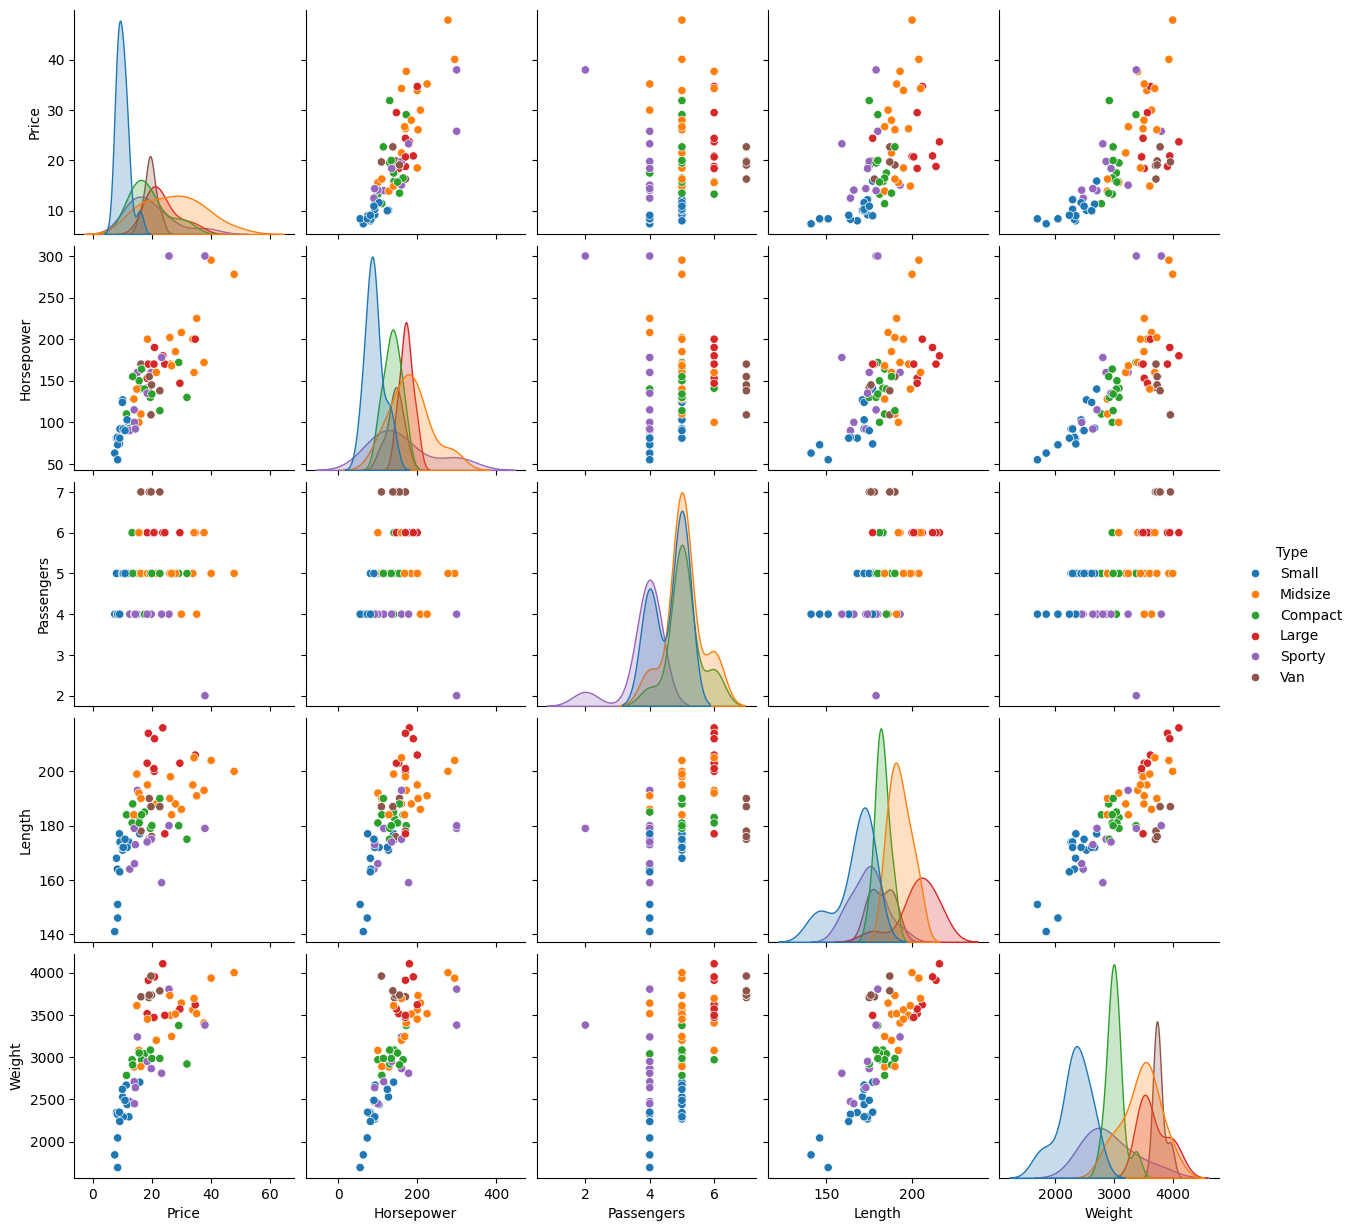

In [29]:
targetvar = 'Type'
g = sns.pairplot(df[['Price', 'Horsepower', 'Passengers', 'Length', 'Weight', targetvar]].dropna(),
                 hue=targetvar)
plt.show()

## Statistical Hypothesis Test
**[TODO]** We would like the test that is there a significant `Passengers`  difference between `small` and `midsize` type car.

Test our hypothesis with proper statistical test with siginificance level as 0.05.

If there is missing value (`nan`) in `pd.Series`, test will not be working properly.

In [30]:
siginificantLevel = 0.05
smallCar = df[df['Type']=='Small']['Passengers'].dropna()
midsizeCar = df[df['Type']=='Midsize']['Passengers'].dropna()

stats, p = ttest_ind(smallCar, midsizeCar, equal_var=False)
print('P-value', format(p, ".19f"))

if p < siginificantLevel:
  print("The Weight of the two types shows a significant difference.")
else:
  print("The Weight of the two types shows no significant difference.")

P-value 0.0039822298937118653
The Weight of the two types shows a significant difference.


# Data Preprocessing

## Handling Outlier

**[TODO]** Exclude the outlier (cars) with too much expensive.
* Assume that `price` of outlier is greater than `Q3 + (1.5 * IQR)`.

In [31]:
attribute = 'Price'

Q1 = df[attribute].quantile(.25)
Q3 = df[attribute].quantile(.75)
IQR = Q3 - Q1
outlierStep = 1.5 * IQR

filtered_df = df[df[attribute] <= Q3 + outlierStep]

Draw histogram of `price`.

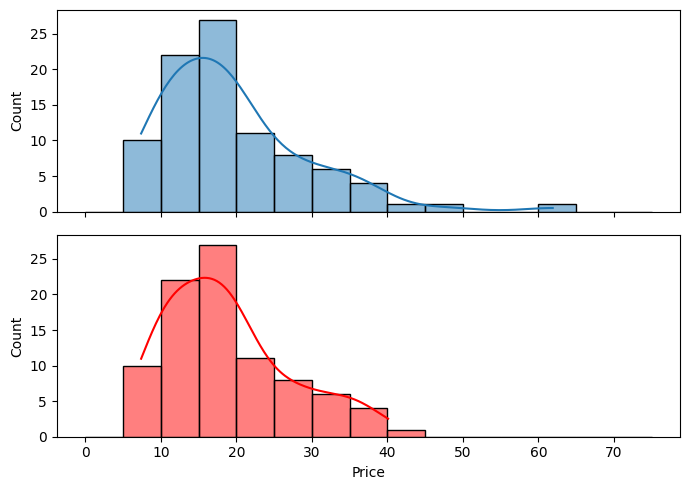

In [32]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x='Price', ax=axes[0], kde=True,
             bins=np.arange(0,80,5))
sns.histplot(data=filtered_df, x='Price', color='Red',
             ax=axes[1], kde=True, bins=np.arange(0,80,5))
f.tight_layout()

## Scaling
**[TODO]** Rescale the numeric attribute using z-score. You can use Scikit-learn or Pandas

In [33]:
numericDf = df.select_dtypes(include='number')

In [34]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
stdScaler = StandardScaler()

# fit and transform the data
std_df = pd.DataFrame(stdScaler.fit_transform(numericDf),
                          columns=numericDf.columns)

std_df.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.480653,-0.384303,-0.250018,0.446943,0.362137,-0.825167,-0.075268,1.699378,1.105120,-1.038052,-0.073951,-0.398738,-0.286924,-0.385565,-0.594931,-0.451142,NaN,-0.669749
1,1.376513,1.476989,1.621054,-0.758573,-0.761310,0.520880,1.053751,0.370874,-0.041313,0.392293,-0.073951,0.824976,1.619527,0.413105,-0.290548,0.715088,0.326975,0.763298
2,1.000522,0.980644,1.019303,-0.414140,-0.574069,0.136295,0.526875,0.370874,-0.154923,0.064506,-0.073951,-0.194786,-0.286924,-0.651788,-0.594931,0.048671,0.004360,0.453223
3,NaN,1.869928,2.175794,-0.586356,-0.574069,NaN,0.526875,0.370874,0.371816,1.316058,0.887412,0.689008,0.299676,NaN,-0.594931,1.048296,0.972206,0.503506
4,NaN,1.073709,NaN,-0.069707,0.174896,0.809318,1.204286,0.703000,0.392473,1.316058,-1.035314,0.213119,0.739627,-0.119341,0.013836,-0.284537,-0.318256,0.897384


## KNNImputer
**[TODO]** Impute the `std_df` with missing value with KNN imputation with parameter `n_neighbors = 2` and `weights` with `distance`.


In [35]:
from sklearn.impute import KNNImputer

imp_KNN = KNNImputer(n_neighbors = 2, weights = 'distance')

impute_df = pd.DataFrame(imp_KNN.fit_transform(std_df),columns=std_df.columns)
impute_df

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.480653,-0.384303,-0.250018,0.446943,0.362137,-0.825167,-0.075268,1.699378,1.105120,-1.038052,-0.073951,-0.398738,-0.286924,-0.385565,-0.594931,-0.451142,-0.640871,-0.669749
1,1.376513,1.476989,1.621054,-0.758573,-0.761310,0.520880,1.053751,0.370874,-0.041313,0.392293,-0.073951,0.824976,1.619527,0.413105,-0.290548,0.715088,0.326975,0.763298
2,1.000522,0.980644,1.019303,-0.414140,-0.574069,0.136295,0.526875,0.370874,-0.154923,0.064506,-0.073951,-0.194786,-0.286924,-0.651788,-0.594931,0.048671,0.004360,0.453223
3,1.152279,1.869928,2.175794,-0.586356,-0.574069,0.176842,0.526875,0.370874,0.371816,1.316058,0.887412,0.689008,0.299676,0.174949,-0.594931,1.048296,0.972206,0.503506
4,0.900555,1.073709,0.979415,-0.069707,0.174896,0.809318,1.204286,0.703000,0.392473,1.316058,-1.035314,0.213119,0.739627,-0.119341,0.013836,-0.284537,-0.318256,0.897384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.059088,0.008636,0.116675,-0.930789,-1.510275,-0.152143,-0.658594,-1.289756,1.156762,1.316058,1.848775,0.281103,1.619527,0.679328,-0.290548,2.047921,0.813418,1.433729
89,0.054849,0.039658,0.088468,-0.241923,0.174896,-0.632874,-0.188170,0.869063,0.681663,0.541288,-0.073951,-0.194786,-0.140274,-0.651788,-1.203698,1.214900,0.004360,-0.200447
90,0.658712,0.380894,0.210699,-0.758573,-0.761310,0.136295,0.639777,0.869063,0.061969,0.541288,-1.035314,-1.622453,-1.020175,-0.918011,-0.899315,-0.617746,0.326975,-0.493761
91,0.533382,0.318851,0.191894,-0.241923,-0.199587,-0.344436,-0.564509,0.204811,-0.289190,-0.263282,-0.073951,0.485055,0.006376,-0.651788,-0.594931,0.548483,0.004360,-0.200447


## Encoding
Filter categorical attribute and remove unnessary attribute using `.drop()`
* unnessary attribute: `Manufacturer`,	`Model`, `Make`

In [36]:
catergorical_df = df.select_dtypes(exclude='number').drop(
    columns=['Manufacturer', 'Model', 'Make'])
catergorical_df.head()

,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,Small,NaN,Front,4,Yes,non-USA
1,Midsize,Driver & Passenger,Front,6,Yes,non-USA
2,Compact,Driver only,Front,6,Yes,non-USA
3,Midsize,Driver & Passenger,NaN,6,NaN,non-USA
4,Midsize,NaN,Rear,4,Yes,non-USA


**[TODO]** Encode remaining categorical attiribute into numeric attribute using label encoding.

In [37]:
from sklearn.preprocessing import LabelEncoder

# create a encoder object
enc = LabelEncoder()

# create empthy dataframe
enc_df = pd.DataFrame()

# fill up data frame with encoded attribute using iteration
for col in catergorical_df.columns:
  enc_df[col] = enc.fit_transform(catergorical_df[col].astype(str).fillna('NA'))
enc_df.head()

,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,3,2,1,1,1,2
1,2,0,1,3,1,2
2,0,1,1,3,1,2
3,2,0,3,3,2,2
4,2,2,2,1,1,2
